## 1. Brainstorming of Possible Rsearch Questions

"Founded in 1984 by Richard Saulman as a non profit organization that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates."

"Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free."

-- Rounak Banik, a Final Year Undergraduate at IIT Roorkee 

### 1.1 Some Topics
1. In the tags of topics, what is happiness usually related to?
2. Which videos attract more views and comments? 
3. What are the sentiments and laughter's realtionship?

### 1.2 Look into Outstanding TED Talks
1. Why is this specific talk selected?
2. try to describe the talk with statistics and visualizations

### 1.3 Content References:
- https://www.kaggle.com/rounakbanik/ted-data-analysis/data
- https://www.kaggle.com/ashokphili/data-visualization-and-analysis-of-ted-talks
- https://www.kaggle.com/lpang36/analysis-of-ted-talk-ratings
- https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

## 2. Packages and Data Import

In [1]:
import pandas as pd
import numpy as np
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("tedtalkdata.csv", encoding='utf-8', sep = ',')

## 3. Data Exploration and Cleaning

In [3]:
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,"3,073,210","TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,NaN
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...","3,050,317","Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,NaN
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...","2,283,917","happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,"12,443,030","business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,NaN
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...","5,114,496","culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,NaN


### 3.1 Features' Availability
- video_page: The official name of the TED Talk. Includes the title and the speaker.
- video_page-href: The URL of the talk.
- description: A blurb of what the talk is about.
- views: The number of views on the talk.
- tag_click: The themes associated with the talk.
- transcript_text: The transcript of the talk.
- comments: The number of first level comments made on the talk.
- pagination：The number assigned to the talk as a periodical.

The avaliable features are limited comparing to the dataset released by TED on Kaggle. We should conduct research according to the data we scrapped.

In [4]:
# the nan's are just 0s
df.fillna(0, inplace=True)
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,"3,073,210","TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...","3,050,317","Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...","2,283,917","happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,"12,443,030","business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...","5,114,496","culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0


In [57]:
df.describe()

,views,comments,pagination,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound,comments_exp,laugh_1000,tfidf_agg
count,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,97.000000
mean,3.490579e+06,199.824742,1.556701,2533.360825,5.969072,1.577320,12.092784,0.061144,0.157722,0.781155,0.977438,3.490579e+06,18.000144,15.771045
std,4.469834e+06,240.191330,1.241379,1304.745906,6.366340,1.760889,11.356058,0.028907,0.042728,0.052512,0.188600,4.195711e+06,20.779936,4.087979
min,0.000000e+00,0.000000,0.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.051000,0.632000,-0.858700,0.000000e+00,0.000000,5.624778
25%,1.046346e+06,44.000000,0.000000,1640.000000,1.000000,1.000000,5.000000,0.040000,0.129000,0.750000,0.998700,7.686009e+05,2.146000,12.933936
50%,2.031771e+06,109.000000,2.000000,2605.000000,4.000000,1.000000,9.000000,0.061000,0.148000,0.784000,0.999600,1.904034e+06,10.420000,15.849540
75%,3.973808e+06,269.000000,3.000000,3409.000000,9.000000,2.000000,16.000000,0.080000,0.180000,0.823000,0.999900,4.698946e+06,24.960000,18.765170
max,2.717206e+07,1037.000000,3.000000,6892.000000,27.000000,11.000000,59.000000,0.144000,0.285000,0.877000,1.000000,1.811453e+07,98.955000,22.990013


- Both comments and pagination have large variation.
- Pagination is not that relevant.

### 3.2 Data Cleaning

In [6]:
# see in detail of several transcripts
# find the parts need to be cleaned
df.transcript_text[0][:1000]

"So the Awesome story:\xa0It begins about 40 years ago,\xa0when my mom and my dad came to Canada.\xa0My mom left Nairobi, Kenya.\xa0My dad left a small village outside of Amritsar, India.\xa0And they got here in the late 1960s.\xa0They settled in a shady suburb about an hour east of Toronto,\xa0and they settled into a new life.\xa0They saw their first dentist,\xa0they ate their first hamburger,\xa0and they had their first kids.\xa0My sister and I\xa0grew up here,\xa0and we had quiet, happy childhoods.\xa0We had close family,\xa0good friends, a quiet street.\xa0We grew up taking for granted\xa0a lot of the things that my parents couldn't take for granted\xa0when they grew up --\xa0things like power always on\xa0in our houses,\xa0things like schools across the street\xa0and hospitals down the road\xa0and popsicles in the backyard.\xa0We grew up, and we grew older.\xa0I went to high school.\xa0I graduated.\xa0I moved out of the house, I got a job,\xa0I found a girl, I settled down --\xa0a

In [7]:
df.transcript_text[1][-1000:]

'f happiness for Dave.\xa0He tells me that he can always count\xa0on Vivian and the staff there\xa0to make him feel at home.\xa0Why is it that\xa0business leaders and investors\xa0quite often don\'t see the connection\xa0between creating the intangible\xa0of employee happiness\xa0with creating the tangible\xa0of financial profits in their business?\xa0We don\'t have to choose between\xa0inspired employees and sizable profits,\xa0we can have both.\xa0In fact, inspired employees quite often\xa0help make sizable profits, right? So what the world needs now,\xa0in my opinion,\xa0is business leaders and political leaders\xa0who know what to count.\xa0We count numbers.\xa0We count on people.\xa0What really counts is when we actually use our numbers\xa0to truly take into account our people.\xa0I learned that from a maid in a motel\xa0and a king of a country.\xa0What can you\xa0start counting today?\xa0What one thing can you start counting today\xa0that actually would be meaningful in your life

Things need to clean:
- replace "\xa0" with " ", as they might just be dividens for transcripts

Interesting findings:
- (Laughter) shows the audiences laugh, could represent some sentiment
- (Applause) is also there, this could also associated with some trend
- ? is also easy to trace, maybe this will also tell us something

In [8]:
# .replace doesn't work
# df["transcript_text"].replace('\xa0', ' ', inplace=True)
# need iteration
for i in range(len(df)):
    df["transcript_text"][i] = df["transcript_text"][i].replace("\xa0"," ")
# need to using c like iteration to access the actual element, not the iterator

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
df.transcript_text[0][:1000] # success

"So the Awesome story: It begins about 40 years ago, when my mom and my dad came to Canada. My mom left Nairobi, Kenya. My dad left a small village outside of Amritsar, India. And they got here in the late 1960s. They settled in a shady suburb about an hour east of Toronto, and they settled into a new life. They saw their first dentist, they ate their first hamburger, and they had their first kids. My sister and I grew up here, and we had quiet, happy childhoods. We had close family, good friends, a quiet street. We grew up taking for granted a lot of the things that my parents couldn't take for granted when they grew up -- things like power always on in our houses, things like schools across the street and hospitals down the road and popsicles in the backyard. We grew up, and we grew older. I went to high school. I graduated. I moved out of the house, I got a job, I found a girl, I settled down -- and I realize it sounds like a bad sitcom or a Cat Stevens' song -- (Laughter) but life 

## 4. Data Manipulation

Plan:
- After the cleaning, we tokenize words;
- we count the number of words;
- we then count the three items mentioned above;
- we give sentiment scores;
- finally, we go to the research questions.

### 4.1 Tokenize and Count Words

In [10]:
# NLTK tokenize
from nltk.tokenize import word_tokenize
df["word_tokens"] = df.transcript_text.apply(lambda x: word_tokenize(x))

In [11]:
# add column of word_counts
df["word_counts"]=df["word_tokens"].apply(lambda x:len(x))

In [12]:
df.head() # \' automatically becomes '

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,"3,073,210","TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...","3,050,317","Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...","2,283,917","happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,"12,443,030","business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...","5,114,496","culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678


In [13]:
df.describe()

,comments,pagination,word_counts
count,97.000000,97.000000,97.000000
mean,199.824742,1.556701,2533.360825
std,240.191330,1.241379,1304.745906
min,0.000000,0.000000,142.000000
25%,44.000000,0.000000,1640.000000
50%,109.000000,2.000000,2605.000000
75%,269.000000,3.000000,3409.000000
max,1037.000000,3.000000,6892.000000


In average, each talk has 2533 words.

### 4.2 Count "(Laughter)", "(Applause)", and "?" 

In [14]:
df["laughter_counts"] = df.word_tokens.apply(lambda x: x.count("Laughter"))
df["applause_counts"] = df.word_tokens.apply(lambda x: x.count("Applause"))
df["question_counts"] = df.word_tokens.apply(lambda x: x.count("?"))

In [15]:
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,laughter_counts,applause_counts,question_counts
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,"3,073,210","TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,14,4,7
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...","3,050,317","Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,3,2,23
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...","2,283,917","happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,6,3,22
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,"12,443,030","business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,11,3,28
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...","5,114,496","culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,1,1,1


### 4.3 Giving Sentiment Scores

In [16]:
# Reference: DH199 Course Material, Prof. Sanders Garcia
def analyze_sentiment(df):
    #initialize empty list 
    sentiments = []
    #initialize sentiment analyzer
    sid = SentimentIntensityAnalyzer()
    
    # give scores for each row
    # use df.shape[0], which count the number of rows.
    for i in range(df.shape[0]):
        # score each line of text with polarity scores
        line = df['transcript_text'].iloc[i]
        sentiment = sid.polarity_scores(line)
        # append sentiment scores for each line to new columns that are labeled according to the sentiment score labels from vader
        sentiments.append([sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']])
    # add this data to the data frame
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    #give each tweet an overall positive/negative label based on compound score thresholds
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df

df = analyze_sentiment(df)
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound,Negative,Positive
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,"3,073,210","TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,14,4,7,0.074,0.133,0.792,0.9996,False,True
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...","3,050,317","Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,3,2,23,0.036,0.137,0.827,0.9999,False,True
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...","2,283,917","happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,6,3,22,0.040,0.199,0.761,0.9999,False,True
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,"12,443,030","business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,11,3,28,0.080,0.148,0.772,0.9998,False,True
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...","5,114,496","culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,1,1,1,0.047,0.144,0.810,0.9998,False,True


In [17]:
df.describe()

,comments,pagination,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,199.824742,1.556701,2533.360825,5.969072,1.577320,12.092784,0.061144,0.157722,0.781155,0.977438
std,240.191330,1.241379,1304.745906,6.366340,1.760889,11.356058,0.028907,0.042728,0.052512,0.188600
min,0.000000,0.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.051000,0.632000,-0.858700
25%,44.000000,0.000000,1640.000000,1.000000,1.000000,5.000000,0.040000,0.129000,0.750000,0.998700
50%,109.000000,2.000000,2605.000000,4.000000,1.000000,9.000000,0.061000,0.148000,0.784000,0.999600
75%,269.000000,3.000000,3409.000000,9.000000,2.000000,16.000000,0.080000,0.180000,0.823000,0.999900
max,1037.000000,3.000000,6892.000000,27.000000,11.000000,59.000000,0.144000,0.285000,0.877000,1.000000


Most of the sentiments are neutral.

In [18]:
# As the talks are neutral in general, and most of them lean to positive, 
# it is not useful in include the "Negative" and "Positive" columns.
df = df.drop(["Negative", "Positive"], axis=1)
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,"3,073,210","TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,14,4,7,0.074,0.133,0.792,0.9996
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...","3,050,317","Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,3,2,23,0.036,0.137,0.827,0.9999
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...","2,283,917","happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,6,3,22,0.040,0.199,0.761,0.9999
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,"12,443,030","business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,11,3,28,0.080,0.148,0.772,0.9998
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...","5,114,496","culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,1,1,1,0.047,0.144,0.810,0.9998


In [68]:
df["video_page-href"][53]

'https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness'

## 5. Research Questions

### 5.1 What are the popular trends of the talks related to happiness?

In [45]:
# Most Viewed Talks, top 15
pop_talks = df[['video_page', 'views']].sort_values('views', ascending=False)[:15]
pop_talks

,video_page,views
53,What makes a good life? Lessons from the longe...,27172061
77,The happy secret to better work,19763445
33,How to stop screwing yourself over,18115788
88,The surprising science of happiness,16883687
7,8 secrets of success,13108035
3,The paradox of choice,12443030
95,All it takes is 10 mindful minutes,10256183
78,The habits of happiness,8545905
28,How to gain control of your free time,8371459
29,"Thoughts on humanity, fame and love",8193238


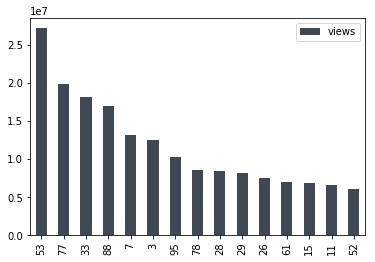

In [47]:
# visualization
pop_talks.plot(kind="bar", color="#404854")

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


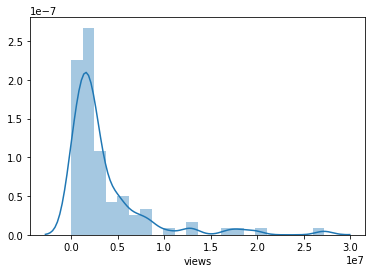

In [49]:
# summary statistics
import seaborn as sns
sns.distplot(df['views'])

### 5.2 What is the topic happiness usually related to?
Count and demonstrate all the tags in the videos, since all the videos have a common tag, happiness.

In [20]:
# split tags
df["tags_split"] = df.tags_click.apply(lambda x: x.lower().replace(",","").split())

In [21]:
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound,tags_split
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,"3,073,210","TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,14,4,7,0.074,0.133,0.792,0.9996,"[tedx, happiness, life, love, personalgrowth, ..."
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...","3,050,317","Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,3,2,23,0.036,0.137,0.827,0.9999,"[buddhism, business, economics, happiness, mon..."
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...","2,283,917","happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,6,3,22,0.040,0.199,0.761,0.9999,"[happiness, creativity, design, evolutionaryps..."
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,"12,443,030","business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,11,3,28,0.080,0.148,0.772,0.9998,"[business, choice, culture, decision-making, e..."
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...","5,114,496","culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,1,1,1,0.047,0.144,0.810,0.9998,"[culture, globalissues, happiness, music, psyc..."


In [22]:
### count and visualize the occurance of all other tags
# get a list of all the tags
tag_list = []
for i in df.tags_split:
    tag_list = tag_list + i
len(tag_list) # large number, success

827

In [23]:
# get a list of all the unqiue tags
unique_tags = list(set(tag_list))
len(unique_tags) # much smaller

169

In [24]:
# create a df to store and unique tags and their counts
happi_tags = pd.DataFrame()
happi_tags["tags"] = unique_tags
happi_tags["count"] = happi_tags.tags.apply(lambda x: tag_list.count(x))
happi_tags.sort_values(by=['count'],ascending=False).head(n=12).reset_index(drop=True).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
tags,happiness,culture,psychology,business,personalgrowth,humanity,science,work,life,design,brain,tedx
count,97,32,32,21,20,20,19,17,16,15,14,14


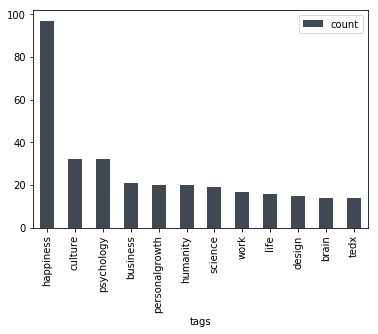

In [46]:
# visualize using bar plot, top 10, as exclude "happiness" itself and "tedx"
happi_tags.sort_values(by=['count'],ascending=False).head(n=12).plot(kind="bar", x="tags", color="#404854")

### 5.3 Will more reviews lead to more comments?
- Create a model to check variation.
- If some of the videos are outliers in the model are outliers, what are they and why?

In [26]:
### visualize the counts of views and comments
# More data cleaning
# Need to str() first, as 0 are int, but all others all str
df["views"]=df["views"].apply(lambda x: int(str(x).replace(",","")))

In [27]:
type(df["views"][0]) # success

numpy.int64

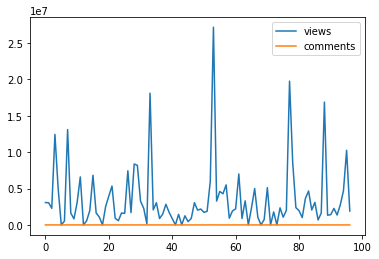

In [28]:
df[["views","comments"]].plot(kind="line") # there are too few comments

In [29]:
df.describe()

,views,comments,pagination,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound
count,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,3.490579e+06,199.824742,1.556701,2533.360825,5.969072,1.577320,12.092784,0.061144,0.157722,0.781155,0.977438
std,4.469834e+06,240.191330,1.241379,1304.745906,6.366340,1.760889,11.356058,0.028907,0.042728,0.052512,0.188600
min,0.000000e+00,0.000000,0.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.051000,0.632000,-0.858700
25%,1.046346e+06,44.000000,0.000000,1640.000000,1.000000,1.000000,5.000000,0.040000,0.129000,0.750000,0.998700
50%,2.031771e+06,109.000000,2.000000,2605.000000,4.000000,1.000000,9.000000,0.061000,0.148000,0.784000,0.999600
75%,3.973808e+06,269.000000,3.000000,3409.000000,9.000000,2.000000,16.000000,0.080000,0.180000,0.823000,0.999900
max,2.717206e+07,1037.000000,3.000000,6892.000000,27.000000,11.000000,59.000000,0.144000,0.285000,0.877000,1.000000


In [30]:
# scale the comments
# out of range when using exp
# 0 is hard to deal with when using log
# we just multiply by the scaling k
# but we still call it exp...
df["comments_exp"] = df["comments"].apply(lambda x: x*df.views.mean()/df.comments.mean())

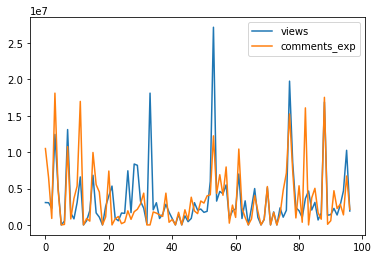

In [31]:
df[["views","comments_exp"]].plot(kind="line")

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


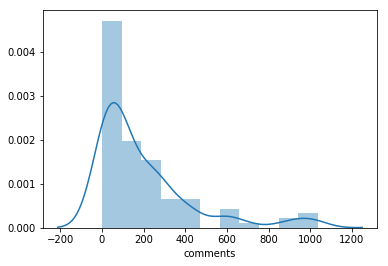

In [50]:
# summary statistics
import seaborn as sns
sns.distplot(df['comments'])

There is somehow a trend, but there could also be plenty of outliers. As there are only 100 talks, a SLR will help us find outliers. 

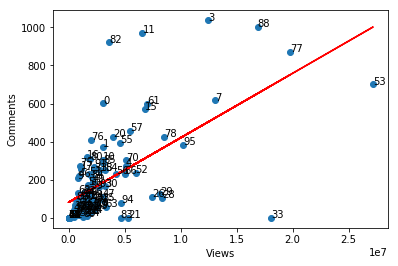

In [32]:
# visualze using a scatter plot
# reference: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
import matplotlib.pyplot as plt
%matplotlib inline
# create a simple linear model to predict # of comments from # of counts
from sklearn import linear_model
regr = linear_model.LinearRegression()
i_x = np.asanyarray(df[['views']])
i_y = np.asanyarray(df[['comments']])
regr.fit(i_x, i_y)
# plot
fig, ax = plt.subplots()
ax.scatter(df.views, df.comments)
ax.plot(i_x, regr.coef_[0][0]*i_x + regr.intercept_[0], '-r')
# add label
ax.set_xlabel("Views")
ax.set_ylabel("Comments")
# add point number
for i, num in enumerate(range(len(df))):
    ax.annotate(num, (list(i_x)[i], list(i_y)[i]))

In [48]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.629711
comments,0.629711,1.000000


It is ok that the cluster on the left bottom has lots of overlaps. We only care about the points outside the cluster, including but not limiting to 82, 11, 3, 33, 21, 83, which correspond to the talks with those line names. The futher investigation and verbal explanation should be written for those points. We need to explain, why some of the talks should be commented more but actually less, while some others should not be commented that much but recieved lots of comments.

In [33]:
# Look at the three most viewed but less commented
# Zero commented ones (exclude)
# 83, 21, 33
# Very less commented ones [not interesting?]
# 26, 28, 29
# and three less commented but more viewed [interesting?]
# 82, 0, 76
df.transcript_text[[26, 28, 29, 82, 0, 76]].to_csv("six_ted_talks.csv")

In [34]:
df["video_page-href"][[26, 28, 29, 82, 0, 76]].to_csv("six_ted_talks_link.csv")

In [ ]:
# wordcloud for them?
# Teammates will use Voyant for this.

### 5.4 Relationship between Times of Laughter and Talks' Sentiments and More
Try to see association of this with neg, pos, and compound scores.

In [35]:
### normalize: laughter per 1000 words
df["laugh_1000"]=df["laughter_counts"]*df["word_counts"]/1000

In [36]:
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound,tags_split,comments_exp,laugh_1000
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,3073210,"TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,14,4,7,0.074,0.133,0.792,0.9996,"[tedx, happiness, life, love, personalgrowth, ...",1.049839e+07,49.014
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...",3050317,"Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,3,2,23,0.036,0.137,0.827,0.9999,"[buddhism, business, economics, happiness, mon...",6.498171e+06,10.227
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...",2283917,"happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,6,3,22,0.040,0.199,0.761,0.9999,"[happiness, creativity, design, evolutionaryps...",8.908783e+05,13.248
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,12443030,"business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,11,3,28,0.080,0.148,0.772,0.9998,"[business, choice, culture, decision-making, e...",1.811453e+07,42.460
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...",5114496,"culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,1,1,1,0.047,0.144,0.810,0.9998,"[culture, globalissues, happiness, music, psyc...",4.786288e+06,2.678


Text(0, 0.5, 'Positive Sentiments')

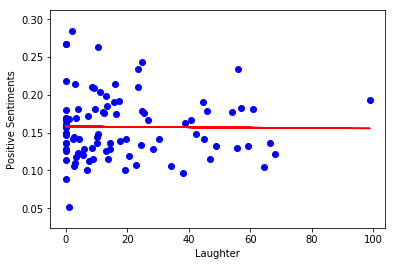

In [37]:
### relationship: pos & laughter
# create a simple linear model to predict pos score from # laugher
regr = linear_model.LinearRegression()
i_x = np.asanyarray(df[['laugh_1000']])
i_y = np.asanyarray(df[['pos']])
regr.fit(i_x, i_y)
# plot
plt.scatter(df.laugh_1000, df.pos,  color='blue')
plt.plot(i_x, regr.coef_[0][0]*i_x + regr.intercept_[0], '-r')
# add label
plt.xlabel("Laughter")
plt.ylabel("Positive Sentiments")

The association is obviously not significant.

Text(0, 0.5, 'Views')

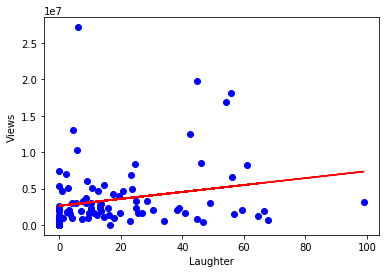

In [38]:
### relationship: view & laughter
# create a simple linear model to predict pos score from # laugher
regr = linear_model.LinearRegression()
i_x = np.asanyarray(df[['laugh_1000']])
i_y = np.asanyarray(df[['views']])
regr.fit(i_x, i_y)
# plot
plt.scatter(df.laugh_1000, df.views,  color='blue')
plt.plot(i_x, regr.coef_[0][0]*i_x + regr.intercept_[0], '-r')
# add label
plt.xlabel("Laughter")
plt.ylabel("Views")

### 5.5 How similar and how different are the talks? Under the topic of happiness, how are the talks related.

Plan:
- Get rid of general stopwords in english first
- Lemmatize
- Use TF-IDF to see the top keywords for each talk
- Cosine similarity
- Network analysis according to the keywords of the two values above
- (optional) Vocabulary density [related research to support] - size, Number of unique words, 
   Chi-square (big dataset),  fisher’s exact test (smaller dataset)

In [39]:
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,laughter_counts,applause_counts,question_counts,neg,pos,neu,compound,tags_split,comments_exp,laugh_1000
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,3073210,"TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,14,4,7,0.074,0.133,0.792,0.9996,"[tedx, happiness, life, love, personalgrowth, ...",1.049839e+07,49.014
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...",3050317,"Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,3,2,23,0.036,0.137,0.827,0.9999,"[buddhism, business, economics, happiness, mon...",6.498171e+06,10.227
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...",2283917,"happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,6,3,22,0.040,0.199,0.761,0.9999,"[happiness, creativity, design, evolutionaryps...",8.908783e+05,13.248
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,12443030,"business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,11,3,28,0.080,0.148,0.772,0.9998,"[business, choice, culture, decision-making, e...",1.811453e+07,42.460
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...",5114496,"culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,1,1,1,0.047,0.144,0.810,0.9998,"[culture, globalissues, happiness, music, psyc...",4.786288e+06,2.678


In [40]:
# reference: https://www.summerrankin.com/dogandponyshow/2017/11/5/ted-talk-recommender
# list of stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['.', '\,'," \'", 'ok','okay','yeah','ya','stuff','?', '\'m', '\'d', ":", '\'s']

In [41]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmizer = WordNetLemmatizer() 
df["lemma_tokens"]=[""]*len(df.word_tokens)

for i in range(len(df.word_tokens)):
    clean_words = []
    for word in df.word_tokens[i]:
    #remove stop words
        if word.lower() not in stop:
            low_word = lemmizer.lemmatize(word)
            #another shot at removing stopwords
            if low_word.lower() not in stop:
                clean_words.append(low_word.lower())
    df["lemma_tokens"][i] = clean_words

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,...,applause_counts,question_counts,neg,pos,neu,compound,tags_split,comments_exp,laugh_1000,lemma_tokens
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,3073210,"TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,...,4,7,0.074,0.133,0.792,0.9996,"[tedx, happiness, life, love, personalgrowth, ...",1.049839e+07,49.014,"[awesome, story, begin, 40, year, ago, ,, mom,..."
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...",3050317,"Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,...,2,23,0.036,0.137,0.827,0.9999,"[buddhism, business, economics, happiness, mon...",6.498171e+06,10.227,"[going, talk, simple, truth, leadership, 21st,..."
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...",2283917,"happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,...,3,22,0.040,0.199,0.761,0.9999,"[happiness, creativity, design, evolutionaryps...",8.908783e+05,13.248,"[2008, ,, finishing, first, year, design, scho..."
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,12443030,"business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,...,3,28,0.080,0.148,0.772,0.9998,"[business, choice, culture, decision-making, e...",1.811453e+07,42.460,"[going, talk, book, mine, hope, resonate, thin..."
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...",5114496,"culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,...,1,1,0.047,0.144,0.810,0.9998,"[culture, globalissues, happiness, music, psyc...",4.786288e+06,2.678,"[grew, europe, ,, world, war, ii, caught, seve..."


In [43]:
# TF_IDF: the word occurs a lot in document and occurs rarely in the corpus
df["lemma_tfidf"]=[""]*len(df.lemma_tokens)
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['lemma_tokens'].apply(lambda x: " ".join(x))).toarray()
for i in range(len(df.lemma_tokens)):
    y = list(x[i])
    df["lemma_tfidf"][i] = y

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
df.head()

,video_page,video_page-href,description,views,tags_click,transcript_text,comments,pagination,word_tokens,word_counts,...,question_counts,neg,pos,neu,compound,tags_split,comments_exp,laugh_1000,lemma_tokens,lemma_tfidf
0,The 3 A's of awesome,https://www.ted.com/talks/neil_pasricha_the_3_...,Neil Pasricha's blog 1000 Awesome Things savor...,3073210,"TEDx, happiness, life, love, personalgrowth, p...",So the Awesome story: It begins about 40 years...,601.0,0.0,"[So, the, Awesome, story, :, It, begins, about...",3501,...,7,0.074,0.133,0.792,0.9996,"[tedx, happiness, life, love, personalgrowth, ...",1.049839e+07,49.014,"[awesome, story, begin, 40, year, ago, ,, mom,...","[0.022175305373561716, 0.0, 0.0, 0.0, 0.031640..."
1,Measuring what makes life worthwhile,https://www.ted.com/talks/chip_conley_measurin...,"When the dotcom bubble burst, hotelier Chip Co...",3050317,"Buddhism, business, economics, happiness, mone...",I'm going to talk about the simple truth in le...,372.0,0.0,"[I, 'm, going, to, talk, about, the, simple, t...",3409,...,23,0.036,0.137,0.827,0.9999,"[buddhism, business, economics, happiness, mon...",6.498171e+06,10.227,"[going, talk, simple, truth, leadership, 21st,...","[0.0, 0.0, 0.0, 0.0, 0.015319587176563483, 0.0..."
2,Where joy hides and how to find it,https://www.ted.com/talks/ingrid_fetell_lee_wh...,"Cherry blossoms and rainbows, bubbles and goog...",2283917,"happiness, creativity, design, evolutionarypsy...","It's 2008, and I'm just finishing my first yea...",51.0,2.0,"[It, 's, 2008, ,, and, I, 'm, just, finishing,...",2208,...,22,0.040,0.199,0.761,0.9999,"[happiness, creativity, design, evolutionaryps...",8.908783e+05,13.248,"[2008, ,, finishing, first, year, design, scho...","[0.0, 0.0, 0.0, 0.0, 0.012312581435671, 0.0, 0..."
3,The paradox of choice,https://www.ted.com/talks/barry_schwartz_on_th...,Psychologist Barry Schwartz takes aim at a cen...,12443030,"business, choice, culture, decision-making, ec...",I'm going to talk to you about some stuff that...,1037.0,0.0,"[I, 'm, going, to, talk, to, you, about, some,...",3860,...,28,0.080,0.148,0.772,0.9998,"[business, choice, culture, decision-making, e...",1.811453e+07,42.460,"[going, talk, book, mine, hope, resonate, thin...","[0.018279055129912628, 0.0, 0.0, 0.0, 0.026081..."
4,"Flow, the secret to happiness",https://www.ted.com/talks/mihaly_csikszentmiha...,"Mihaly Csikszentmihalyi asks, ""What makes a li...",5114496,"culture, globalissues, happiness, music, psych...","I grew up in Europe, and World War II caught m...",274.0,0.0,"[I, grew, up, in, Europe, ,, and, World, War, ...",2678,...,1,0.047,0.144,0.810,0.9998,"[culture, globalissues, happiness, music, psyc...",4.786288e+06,2.678,"[grew, europe, ,, world, war, ii, caught, seve...","[0.026506293636514012, 0.0, 0.0, 0.0, 0.037820..."


In [55]:
df["tfidf_agg"]=df.lemma_tfidf.apply(lambda x: sum(x))
df.tfidf_agg.describe()

count    97.000000
mean     15.771045
std       4.087979
min       5.624778
25%      12.933936
50%      15.849540
75%      18.765170
max      22.990013
Name: tfidf_agg, dtype: float64

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


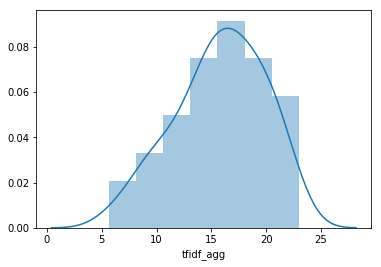

In [56]:
sns.distplot(df['tfidf_agg'])

### 5.6 End Notes
1. It may be easier to draw some of the plots in R;
2. Some further questions can be discussed, relating to appause and question.
3. If more data collected, we can research on comments' details.
4. Need to know better how to analyse and visualize tf-idf.
5. Cosine similarity, no chace to usethis time, but worth trying in the future.
5. More in white paper and website.

For further study:
- https://www.mien.in/2017/10/02/visual-text-analytics-with-python/
- https://medium.com/district-data-labs/beyond-the-word-cloud-428e3c25b59c